In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/predict-the-success-of-bank-telemarketing/sample_submission.csv
/kaggle/input/predict-the-success-of-bank-telemarketing/train.csv
/kaggle/input/predict-the-success-of-bank-telemarketing/test.csv


---------------------

# Exploratory Data Analysis (EDA)

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('/kaggle/input/predict-the-success-of-bank-telemarketing/train.csv')
print(df.head())

  last contact date  age           job  marital  education default  balance  \
0        2009-04-17   26   blue-collar  married  secondary      no      647   
1        2009-10-11   52    technician  married  secondary      no      553   
2        2010-11-20   44   blue-collar  married  secondary      no     1397   
3        2009-09-01   33        admin.  married  secondary      no      394   
4        2008-01-29   31  entrepreneur   single   tertiary      no      137   

  housing loan    contact  duration  campaign  pdays  previous poutcome target  
0     yes   no   cellular       357         2    331         1    other     no  
1     yes   no  telephone       160         1     -1         0      NaN     no  
2      no   no   cellular       326         1     -1         0      NaN     no  
3     yes   no  telephone       104         3     -1         0      NaN     no  
4      no   no   cellular       445         2     -1         0      NaN     no  


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39211 entries, 0 to 39210
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   last contact date  39211 non-null  object
 1   age                39211 non-null  int64 
 2   job                38982 non-null  object
 3   marital            39211 non-null  object
 4   education          37744 non-null  object
 5   default            39211 non-null  object
 6   balance            39211 non-null  int64 
 7   housing            39211 non-null  object
 8   loan               39211 non-null  object
 9   contact            28875 non-null  object
 10  duration           39211 non-null  int64 
 11  campaign           39211 non-null  int64 
 12  pdays              39211 non-null  int64 
 13  previous           39211 non-null  int64 
 14  poutcome           9760 non-null   object
 15  target             39211 non-null  object
dtypes: int64(6), object(10)
memory usage: 4.

In [5]:
df.describe()

,age,balance,duration,campaign,pdays,previous
count,39211.000000,39211.000000,39211.000000,39211.000000,39211.000000,39211.000000
mean,42.120247,5441.781719,439.062789,5.108770,72.256051,11.826171
std,12.709352,16365.292065,769.096291,9.890153,160.942593,44.140259
min,18.000000,-8019.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,98.000000,109.000000,1.000000,-1.000000,0.000000
50%,40.000000,549.000000,197.000000,2.000000,-1.000000,0.000000
75%,50.000000,2030.000000,380.000000,4.000000,-1.000000,0.000000
max,95.000000,102127.000000,4918.000000,63.000000,871.000000,275.000000


In [6]:
missing_values = df.isnull().sum()

In [7]:
missing_values

last contact date        0
age                      0
job                    229
marital                  0
education             1467
default                  0
balance                  0
housing                  0
loan                     0
contact              10336
duration                 0
campaign                 0
pdays                    0
previous                 0
poutcome             29451
target                   0
dtype: int64

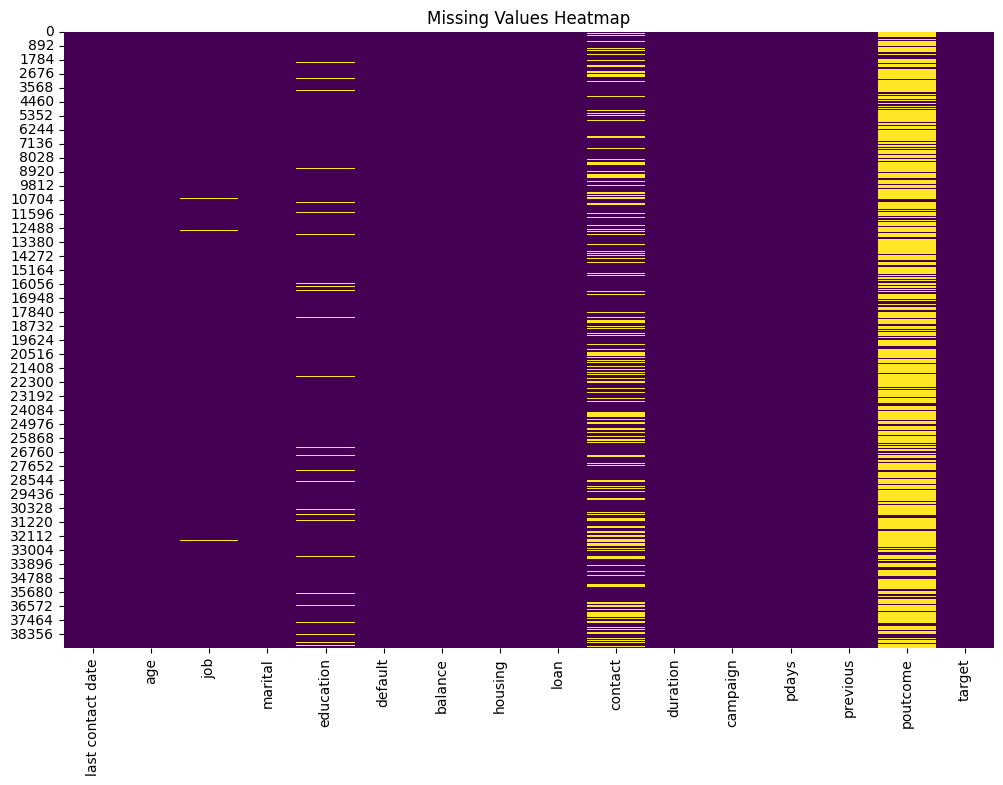

In [8]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values Heatmap")
plt.show()

In [9]:
df['contact'] = df['contact'].replace('', 'unknown')
df['poutcome'] = df['poutcome'].replace('', 'unknown')

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


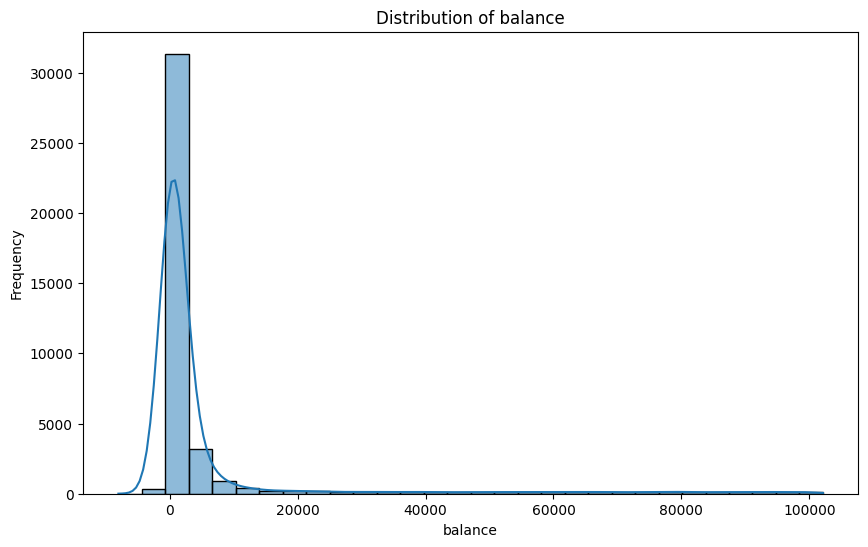

In [10]:
plt.figure(figsize=(10, 6))
sns.histplot(df['balance'], kde=True, bins=30)
plt.title(f"Distribution of balance")
plt.xlabel('balance')
plt.ylabel("Frequency")
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


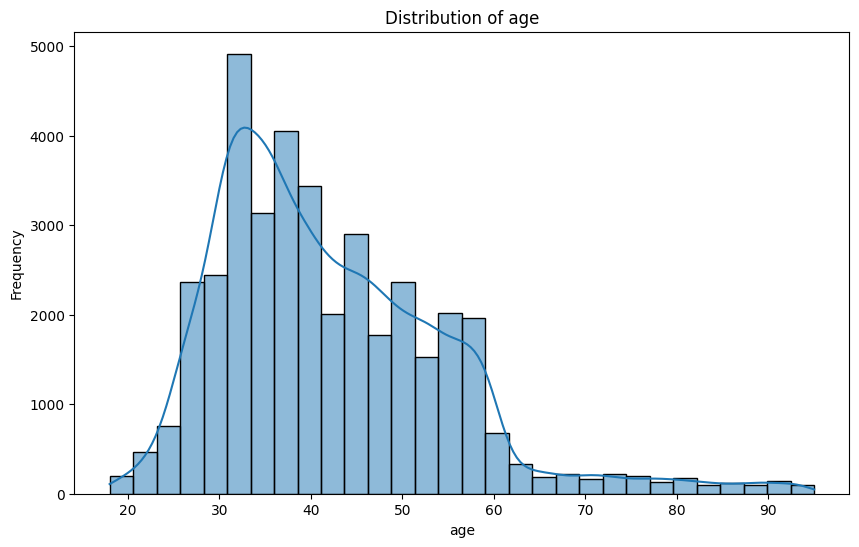

In [11]:
plt.figure(figsize=(10, 6))
sns.histplot(df['age'], kde=True, bins=30)
plt.title(f"Distribution of age")
plt.xlabel('age')
plt.ylabel("Frequency")
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


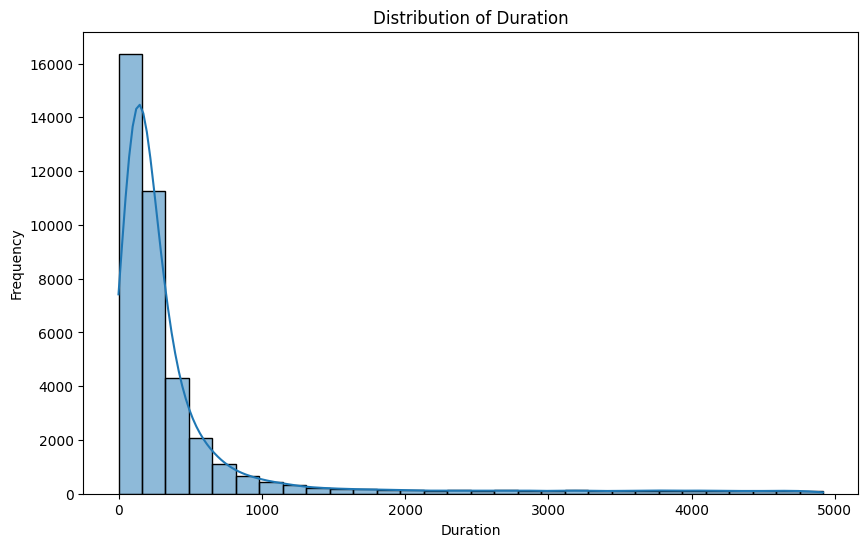

In [12]:
plt.figure(figsize=(10, 6))
sns.histplot(df['duration'], kde=True, bins=30)
plt.title(f"Distribution of Duration")
plt.xlabel('Duration')
plt.ylabel("Frequency")
plt.show()

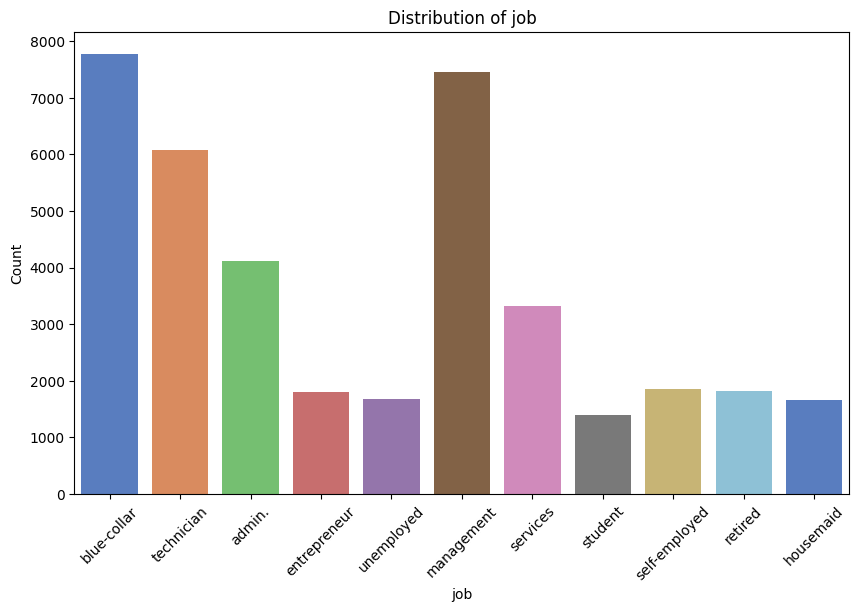

In [13]:
plt.figure(figsize=(10, 6))
sns.countplot(x='job', data=df, palette="muted")
plt.title(f"Distribution of job")
plt.xlabel('job')
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

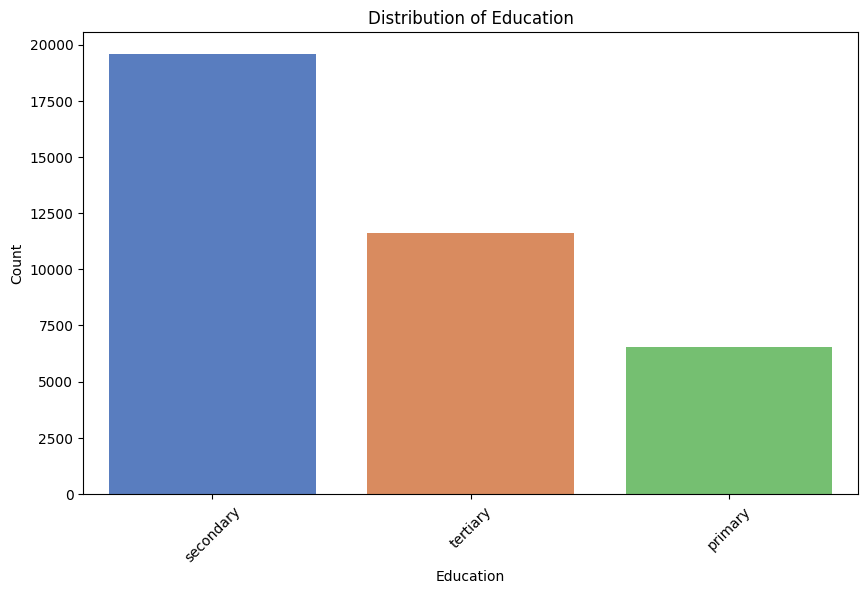

In [14]:
plt.figure(figsize=(10, 6))
sns.countplot(x='education', data=df, palette="muted")
plt.title(f"Distribution of Education")
plt.xlabel('Education')
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

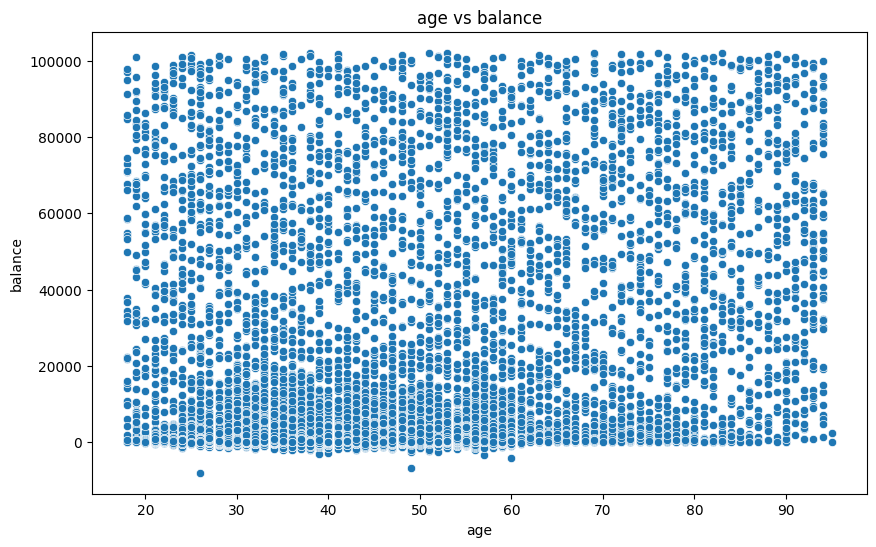

In [15]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='balance', data=df)
plt.title(f"age vs balance")
plt.xlabel('age')
plt.ylabel('balance')
plt.show()

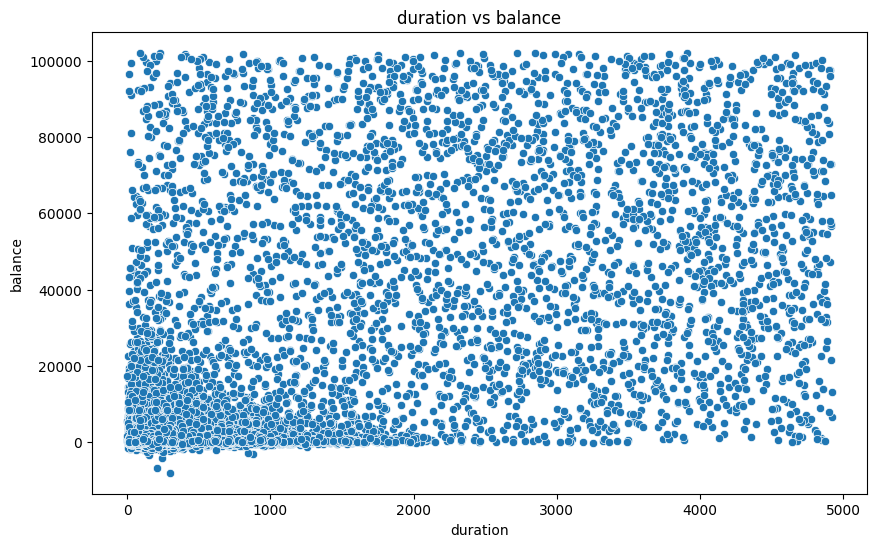

In [16]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='duration', y='balance', data=df)
plt.title(f"duration vs balance")
plt.xlabel('duration')
plt.ylabel('balance')
plt.show()

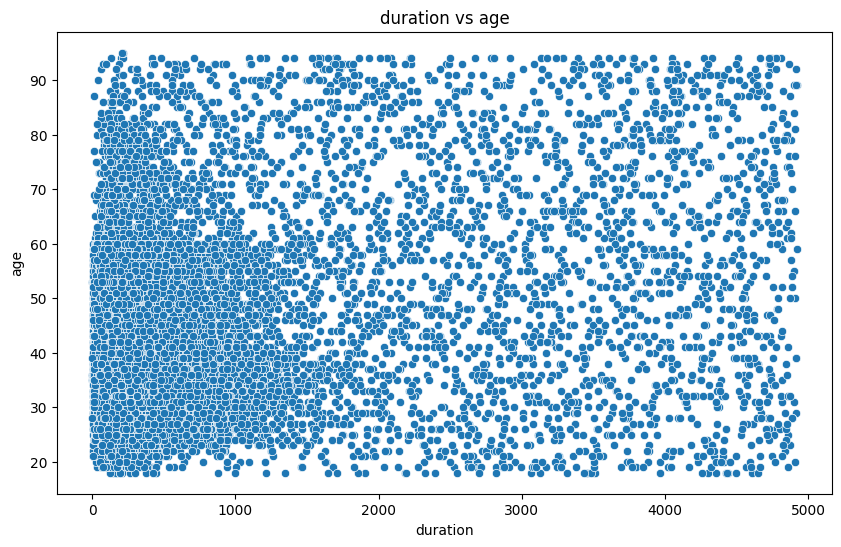

In [17]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='duration', y='age', data=df)
plt.title(f"duration vs age")
plt.xlabel('duration')
plt.ylabel('age')
plt.show()

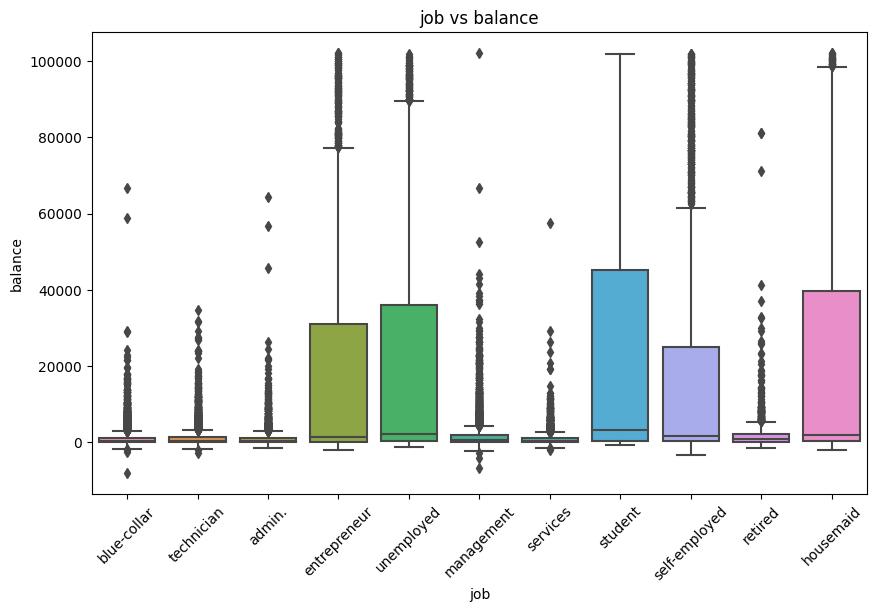

In [18]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='job', y='balance', data=df)
plt.title(f"job vs balance")
plt.xlabel('job')
plt.ylabel('balance')
plt.xticks(rotation=45)
plt.show()

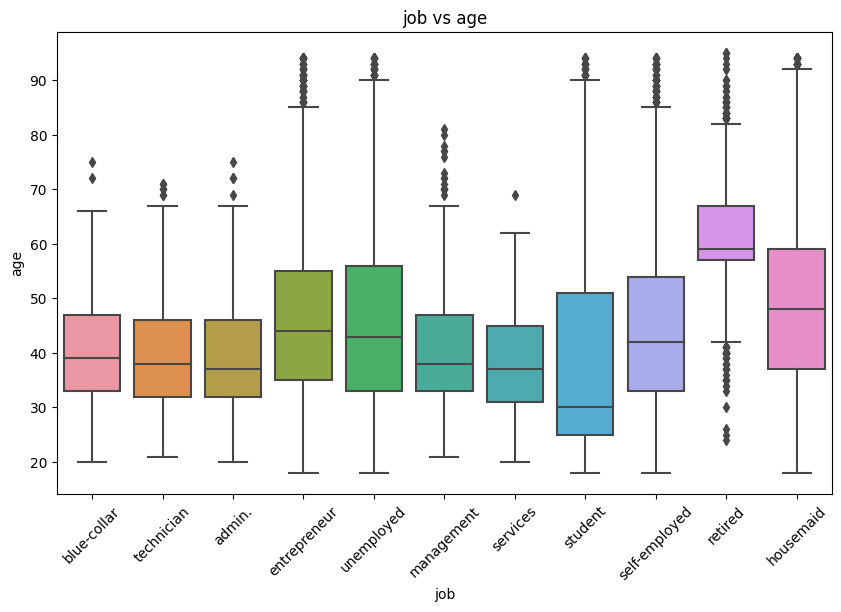

In [19]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='job', y='age', data=df)
plt.title(f"job vs age")
plt.xlabel('job')
plt.ylabel('age')
plt.xticks(rotation=45)
plt.show()

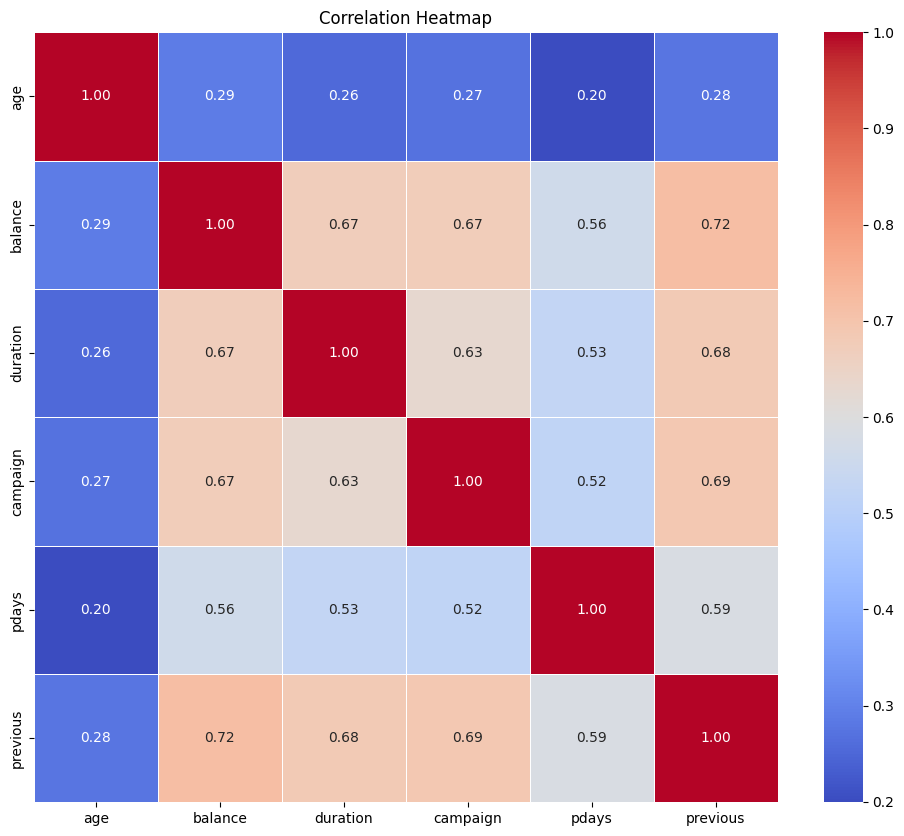

In [20]:
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
corr_matrix = df[numeric_cols].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

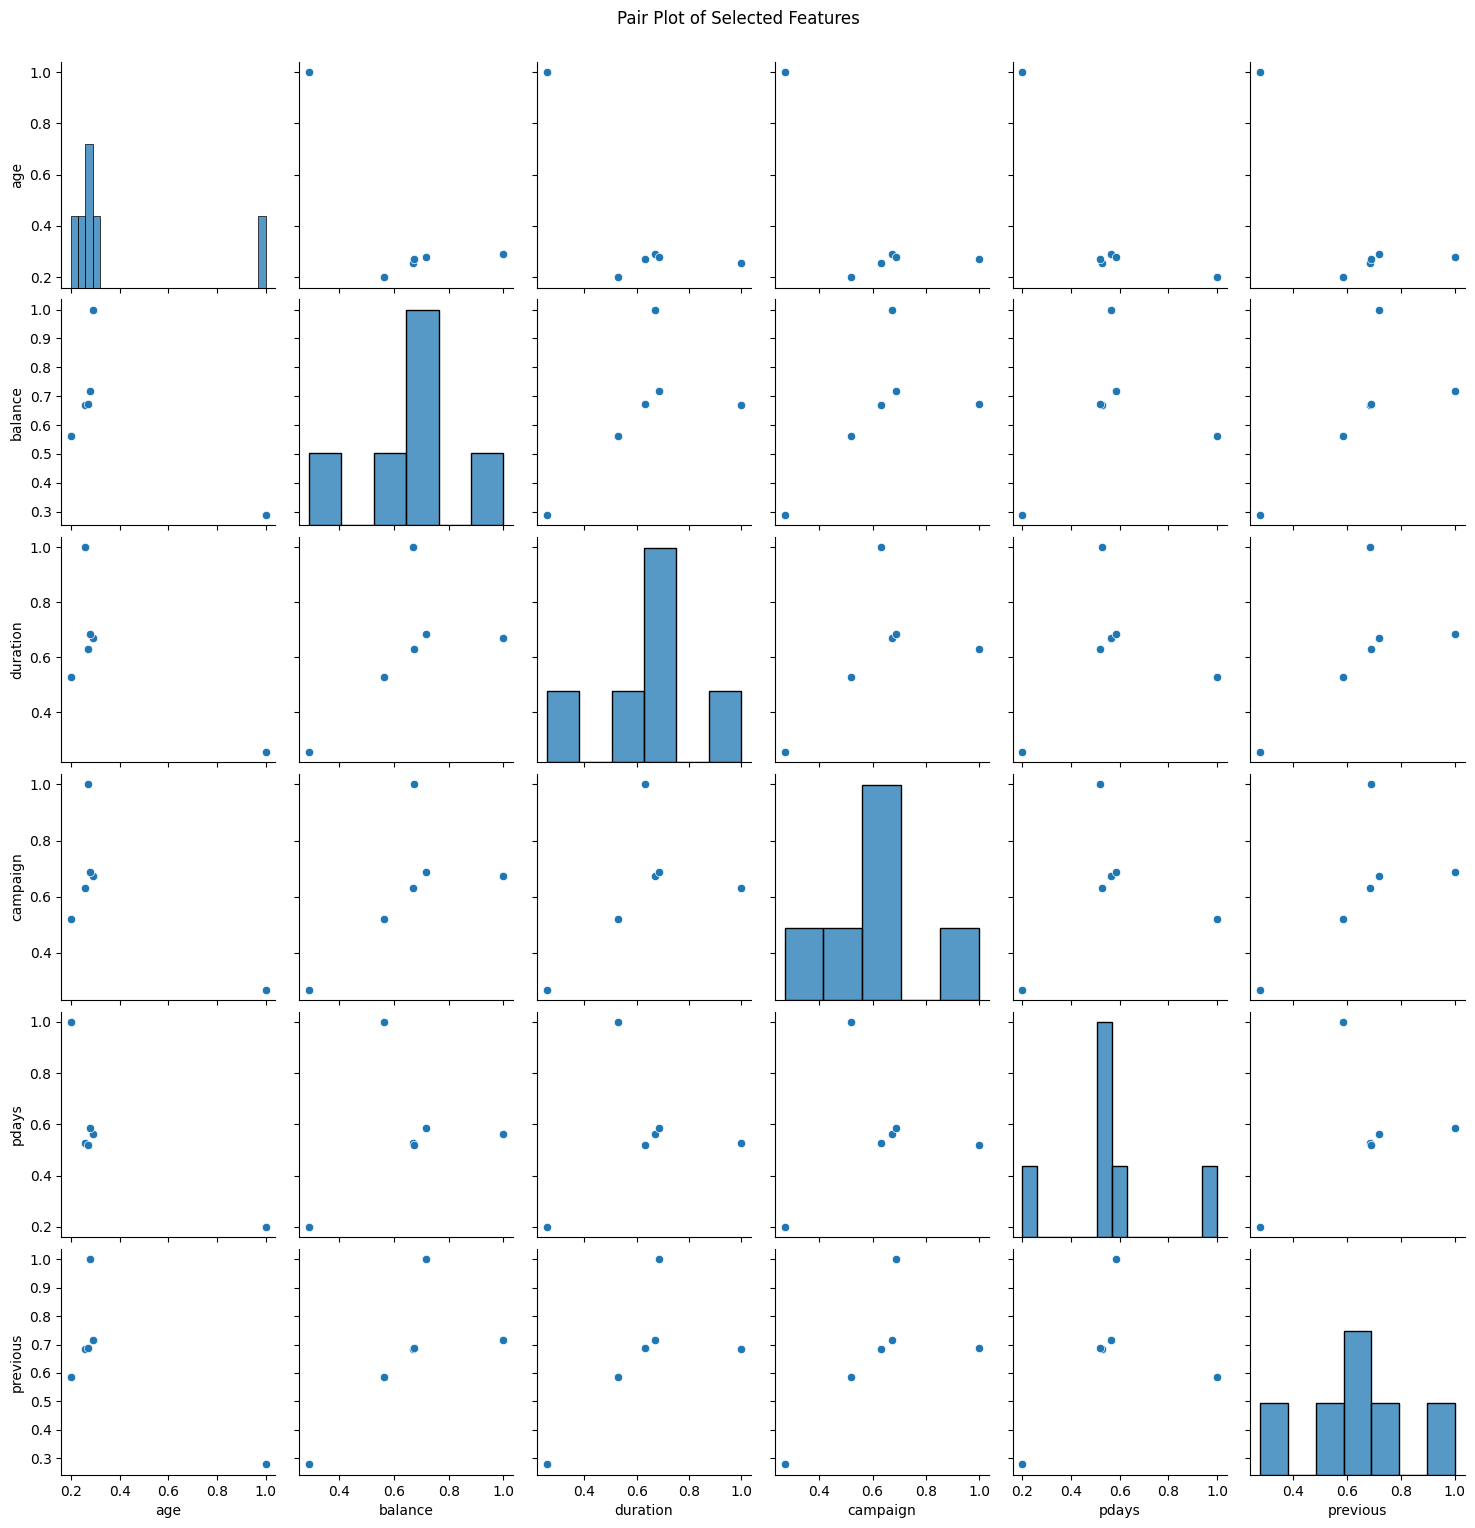

In [21]:
sns.pairplot(corr_matrix)
plt.suptitle("Pair Plot of Selected Features", y=1.02)
plt.show()

--------------

# Model Building

## Import Libraries and Load Data

In [22]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt

# Load data
train_data = pd.read_csv('/kaggle/input/predict-the-success-of-bank-telemarketing/train.csv')
test_data = pd.read_csv('/kaggle/input/predict-the-success-of-bank-telemarketing/test.csv')

# Display the first few rows of train and test data
train_data.head(), test_data.head()

(  last contact date  age           job  marital  education default  balance  \
 0        2009-04-17   26   blue-collar  married  secondary      no      647   
 1        2009-10-11   52    technician  married  secondary      no      553   
 2        2010-11-20   44   blue-collar  married  secondary      no     1397   
 3        2009-09-01   33        admin.  married  secondary      no      394   
 4        2008-01-29   31  entrepreneur   single   tertiary      no      137   
 
   housing loan    contact  duration  campaign  pdays  previous poutcome target  
 0     yes   no   cellular       357         2    331         1    other     no  
 1     yes   no  telephone       160         1     -1         0      NaN     no  
 2      no   no   cellular       326         1     -1         0      NaN     no  
 3     yes   no  telephone       104         3     -1         0      NaN     no  
 4      no   no   cellular       445         2     -1         0      NaN     no  ,
   last contact date  age

## Data Preprocessing

In [23]:
# Drop unnecessary columns
if 'last contact date' in train_data.columns:
    train_data = train_data.drop('last contact date', axis=1)
if 'last contact date' in test_data.columns:
    test_data = test_data.drop('last contact date', axis=1)

# Encode target variable
train_data['target'] = train_data['target'].apply(lambda x: 1 if x == 'yes' else 0)

# Split features and target
X_train = train_data.drop('target', axis=1)
y_train = train_data['target']
X_test = test_data

# Separate numeric and categorical features
numeric_features = ['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']
categorical_features = ['job', 'marital', 'education', 'housing', 'loan', 'poutcome']

# Handle missing values
X_train[numeric_features] = X_train[numeric_features].fillna(X_train[numeric_features].median())
X_test[numeric_features] = X_test[numeric_features].fillna(X_train[numeric_features].median())
X_train[categorical_features] = X_train[categorical_features].fillna(X_train[categorical_features].mode().iloc[0])
X_test[categorical_features] = X_test[categorical_features].fillna(X_train[categorical_features].mode().iloc[0])

## Feature Transformation

In [24]:
# Define preprocessing
numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])
categorical_transformer = Pipeline(steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))])
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

# Preprocess data
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

# Handle class imbalance using SMOTE
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_processed, y_train)

## Feature Selection and Dimensionality Reduction

In [25]:
# Feature selection
rfe_selector = RFE(LogisticRegression(random_state=42, max_iter=500), n_features_to_select=20, step=1)
X_train_rfe = rfe_selector.fit_transform(X_train_balanced, y_train_balanced)
X_test_rfe = rfe_selector.transform(X_test_processed)

# Dimensionality reduction with PCA
pca = PCA(n_components=15)
X_train_pca = pca.fit_transform(X_train_rfe)
X_test_pca = pca.transform(X_test_rfe)

## Model Initialization

In [26]:
# Initialize models
log_reg = LogisticRegression(random_state=42, max_iter=500, class_weight='balanced')
naive_bayes = GaussianNB()
knn = KNeighborsClassifier()
svm = SVC(probability=True, random_state=42, class_weight='balanced')
rf = RandomForestClassifier(random_state=42, class_weight='balanced')
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
gb = GradientBoostingClassifier(random_state=42)
ada = AdaBoostClassifier(random_state=42)

## Hyperparameter Tuning

In [27]:
# Hyperparameter tuning for Random Forest and XGBoost
rf_params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10]
}
xgb_params = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'n_estimators': [100, 200, 300]
}

rf_random = RandomizedSearchCV(estimator=rf, param_distributions=rf_params, n_iter=20, cv=5, random_state=42)
xgb_random = RandomizedSearchCV(estimator=xgb, param_distributions=xgb_params, n_iter=20, cv=5, random_state=42)

rf_random.fit(X_train_pca, y_train_balanced)
xgb_random.fit(X_train_pca, y_train_balanced)

# Updated models with best parameters
rf_best = rf_random.best_estimator_
xgb_best = xgb_random.best_estimator_

## Ensemble Model and Evaluation

Model Accuracies:
Logistic Regression: 0.7704
Naive Bayes: 0.6754
KNN: 0.8923
SVM: 0.8316
Random Forest: 0.9618
XGBoost: 0.9035
Gradient Boosting: 0.8299
AdaBoost: 0.8064


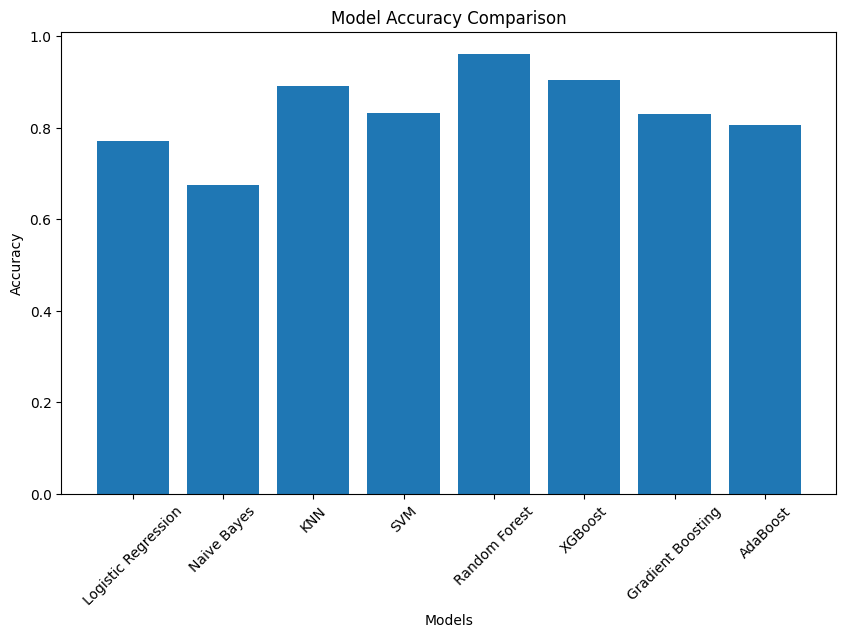


Voting Classifier Training Accuracy: 0.8775
Voting Classifier Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.87      0.88     33384
           1       0.87      0.88      0.88     33384

    accuracy                           0.88     66768
   macro avg       0.88      0.88      0.88     66768
weighted avg       0.88      0.88      0.88     66768



In [28]:
# # Evaluate individual models
models = {
    "Logistic Regression": log_reg,
    "Naive Bayes": naive_bayes,
    "KNN": knn,
    "SVM": svm,
    "Random Forest": rf_best,
    "XGBoost": xgb_best,
    "Gradient Boosting": gb,
    "AdaBoost": ada
}

model_accuracies = {}

# Fit each model and calculate training accuracy
for name, model in models.items():
    model.fit(X_train_pca, y_train_balanced)
    y_pred = model.predict(X_train_pca)
    accuracy = accuracy_score(y_train_balanced, y_pred)
    model_accuracies[name] = accuracy

# Print individual model accuracies
print("Model Accuracies:")
for model_name, acc in model_accuracies.items():
    print(f"{model_name}: {acc:.4f}")

# Plot model accuracies
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(model_accuracies.keys(), model_accuracies.values())
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Model Accuracy Comparison")
plt.xticks(rotation=45)
plt.show()

# Use the voting classifier for final prediction
voting_clf = VotingClassifier(
    estimators=[
        ('log_reg', log_reg),
        ('naive_bayes', naive_bayes),
        ('knn', knn),
        ('svm', svm),
        ('rf', rf_best),
        ('xgb', xgb_best),
        ('gb', gb),
        ('ada', ada)
    ],
    voting='soft'
)

# Fit the voting classifier
voting_clf.fit(X_train_pca, y_train_balanced)

# Evaluate voting classifier on training data
y_pred_train = voting_clf.predict(X_train_pca)
voting_accuracy = accuracy_score(y_train_balanced, y_pred_train)
print(f"\nVoting Classifier Training Accuracy: {voting_accuracy:.4f}")
print("Voting Classifier Classification Report:")
print(classification_report(y_train_balanced, y_pred_train))

## Final Predictions and File Export

In [29]:
# Predict on test data using voting classifier
y_pred_test = voting_clf.predict(X_test_pca)
output = pd.DataFrame({'id': X_test.index, 'target': ['yes' if pred == 1 else 'no' for pred in y_pred_test]})

# Ensure output has at least 10,000 rows
if output.shape[0] < 10000:
    extra_rows = 10000 - output.shape[0]
    extra_data = pd.DataFrame({'id': range(output.shape[0], output.shape[0] + extra_rows), 'target': 'no'})
    output = pd.concat([output, extra_data], ignore_index=True)

# Save and make file downloadable
output.to_csv('/kaggle/working/submission.csv', index=False)
print("\nYour submission file is saved and ready for download.")


Your submission file is saved and ready for download.


---------------